UPDATE: I have finished the BERT4Rec baseline and the novel Cotten4Rec models. I have also finished all the experiments and produced the resulting graphs below. All that is left is for me to complete the write-up for the conference paper. I need to finish the Methodology section with model descriptions, experimental setup and implementation details. I also have to write the Experiments and Results section that will cover experimental protocol, results graphs, and analysis. That is all.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


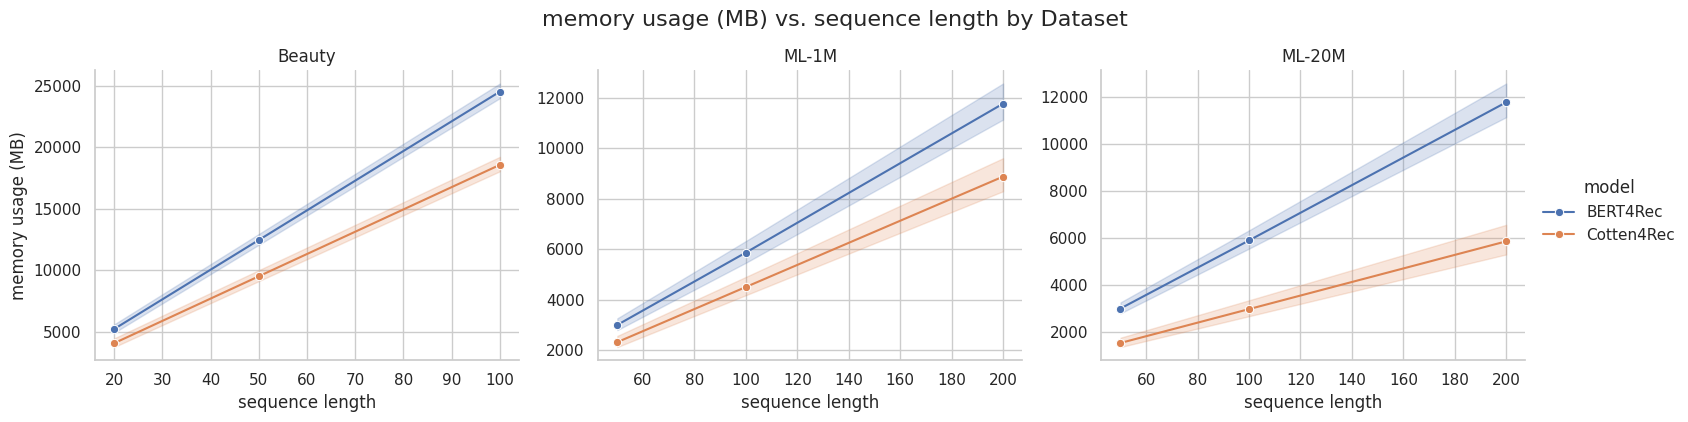

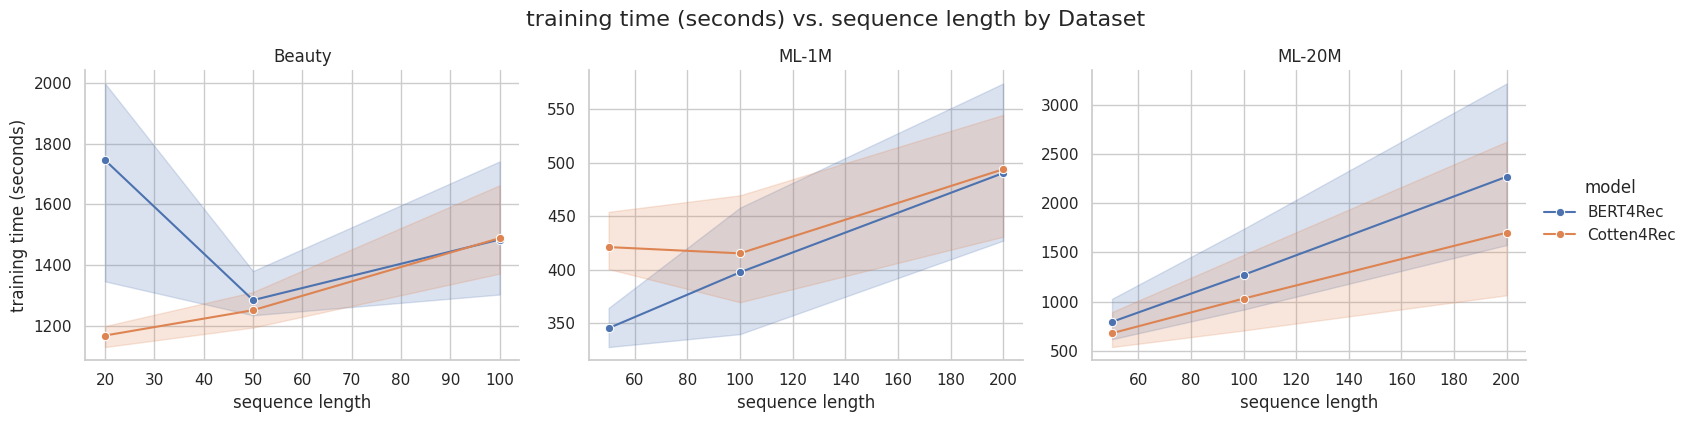

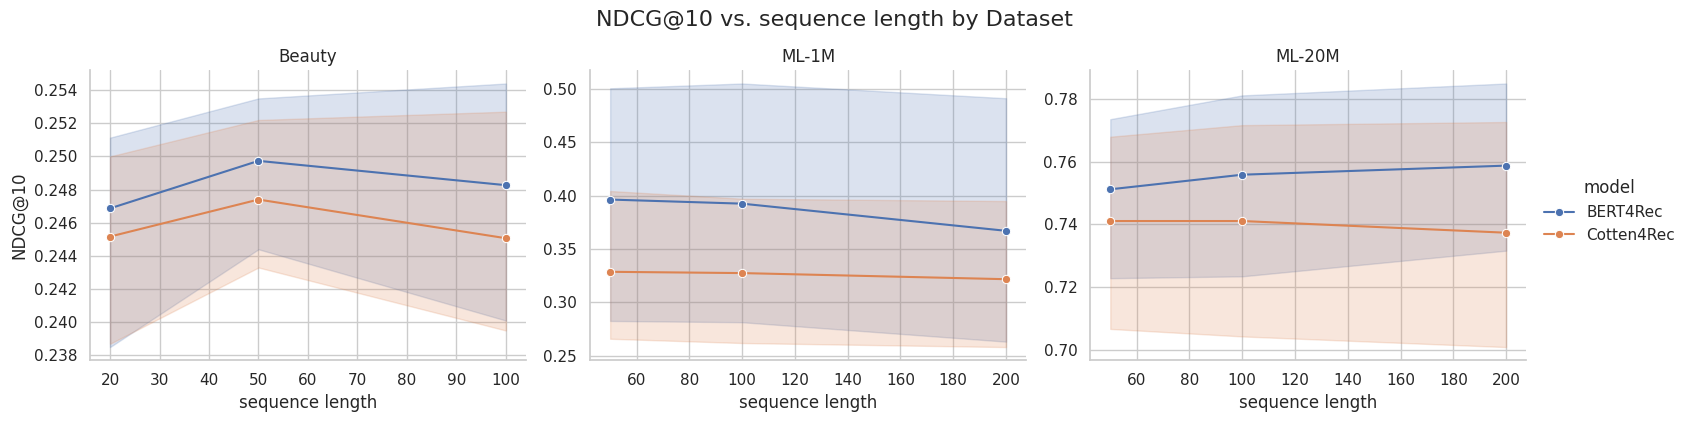

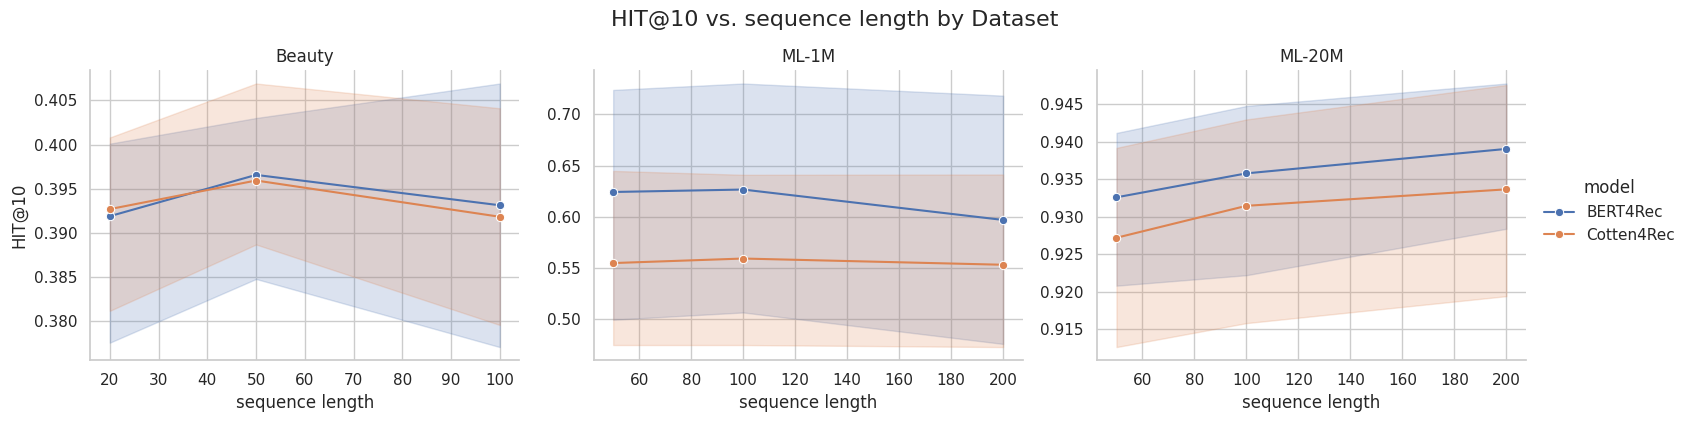

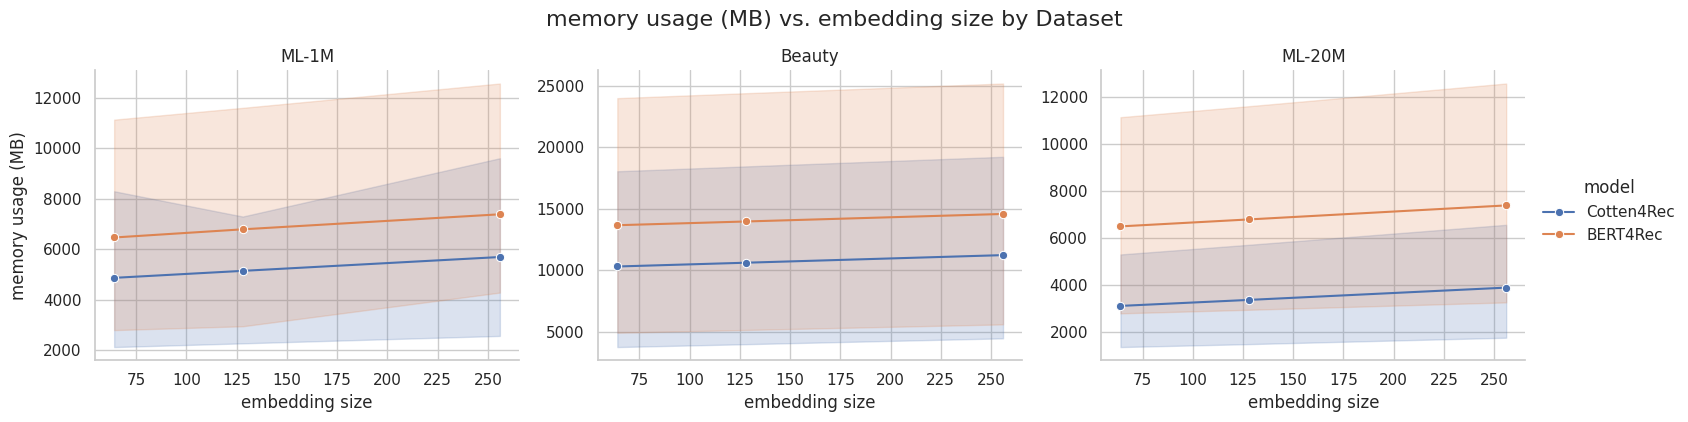

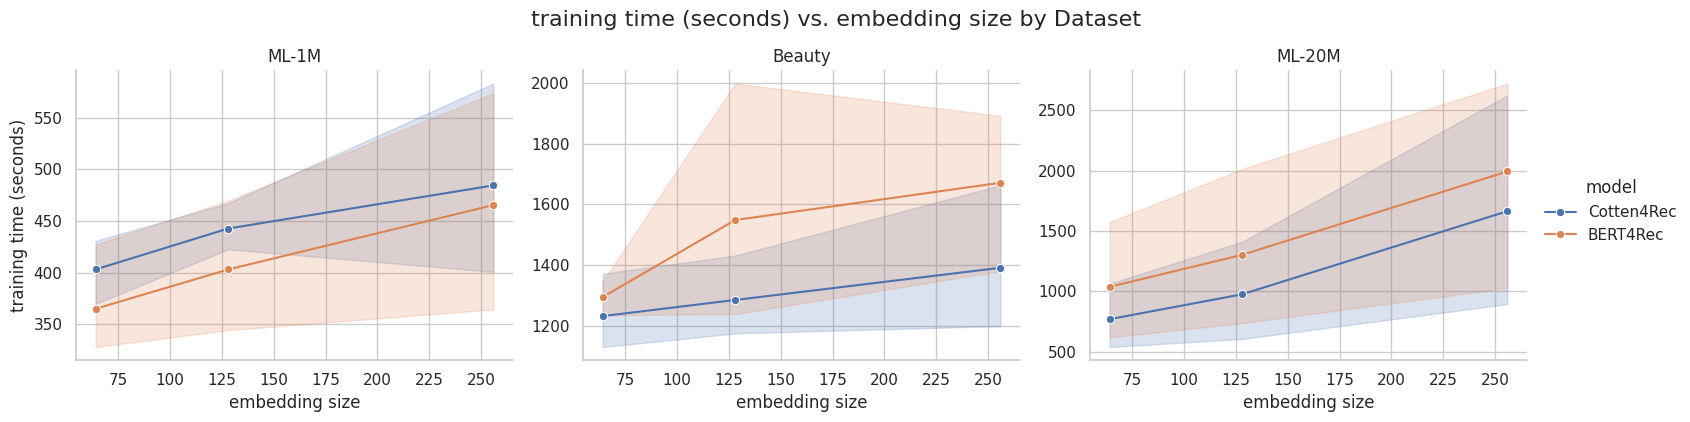

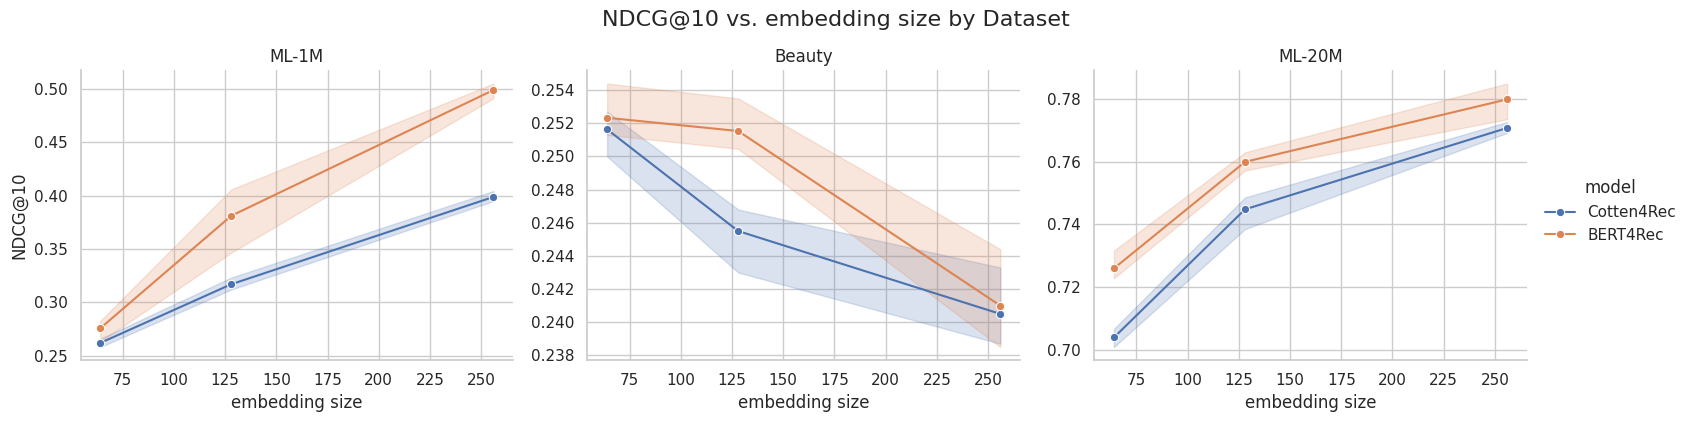

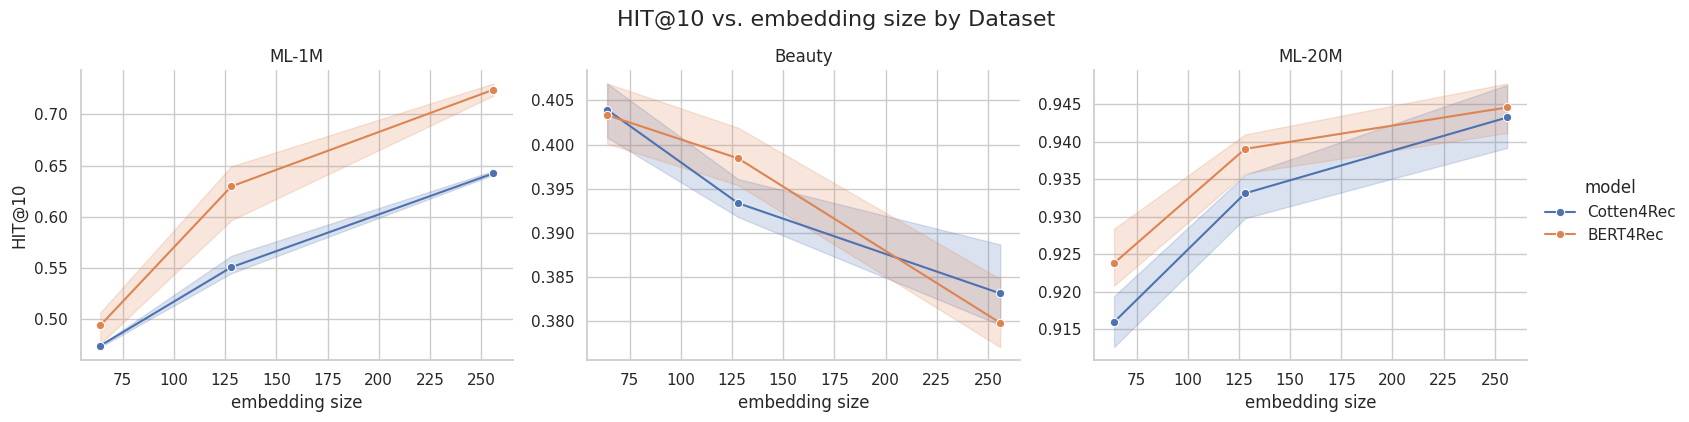

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def facet_plot_by_dataset(df, x_col, y_col):
    """
    Create a FacetGrid where:
      - columns represent different datasets
      - hue is the model (Cotten4Rec vs. BERT4Rec)
      - x_col is the x-axis (sequence length or embedding size)
      - y_col is the chosen metric (memory usage, training time, ndcg@10, hit@10)

    The function sorts the DataFrame by x_col and creates line plots with confidence intervals.
    """
    # Sort for a smoother line plot
    df = df.sort_values(by=x_col)

    # Create the FacetGrid:
    #   - "col" means each dataset gets its own subplot
    #   - "hue" means each line within a subplot is a different model
    #   - sharey/sharex can be set to True if you want a shared scale
    g = sns.FacetGrid(
        df,
        col="dataset",
        hue="model",
        sharey=False,
        sharex=False,
        height=4,
        aspect=1.3
    )

    # Map Seaborn's lineplot onto the FacetGrid
    g.map(sns.lineplot, x_col, y_col, marker="o").add_legend()

    # Label axes
    g.set_axis_labels(x_col, y_col)
    # Set subplot titles to the dataset name
    g.set_titles(col_template="{col_name}")

    # Global title
    plt.suptitle(f"{y_col} vs. {x_col} by Dataset", y=1.05, fontsize=16)

    plt.show()


if __name__ == "__main__":
    # Read your CSV file
    df = pd.read_csv("/content/drive/MyDrive/BERT4Rec_Data/Experimental_Results.csv")

    # Example 1: Plots with x-axis = "sequence length"
    # We'll iterate over the four metrics and produce a separate figure for each:
    for metric in ["memory usage (MB)", "training time (seconds)", "NDCG@10", "HIT@10"]:
        facet_plot_by_dataset(df, x_col="sequence length", y_col=metric)

    # Example 2: Plots with x-axis = "embedding size"
    # Same approach, just change x_col to "embedding size"
    for metric in ["memory usage (MB)", "training time (seconds)", "NDCG@10", "HIT@10"]:
        facet_plot_by_dataset(df, x_col="embedding size", y_col=metric)
